## Introduction 
### It is a non-linear classifier
### Bayes Theorem
![](images/bayes1.jpg)
## Naive Bayes Plan of Attack
### How does it classify a new observation ?
![](images/bayes2.jpg)
### 1. Apply the Bayes Theorem twice
### 1.1
![](images/bayes4.jpg)
#### Prior Probability
![](images/bayes7.jpg)
#### Marginal Likelihood
![](images/bayes8.jpg)
#### Likelihood
![](images/bayes9.jpg)
#### Posterior Probability
![](images/baye10.jpg)
### 1.2
![](images/bayes5.jpg)
### Do the dame thing as before
#### Posterior Probability
![](images/bayes11.jpg)
### 2. Compare the two conditional probabilities
![](images/bayes6.jpg)
#### 0.75 vs 0.25 
![](images/bayes12.jpg)
### It therefore classifies this new point as someone who walks

## Extra Info 
### Watch here : https://www.udemy.com/course/machinelearning/learn/lecture/5732742#content

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Importing the data

In [2]:
data = pd.read_csv('data/Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Creating training and test splits

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building a Naive Bayes Classifier model

In [6]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

nbc.fit(X_train, y_train)

GaussianNB()

## Evaluating the model
### Using the `.score` method

In [7]:
nbc.score(X_test, y_test)

0.9

### Using the sklearn `metrics`

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_preds = nbc.predict(X_test)

In [9]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [10]:
print(accuracy_score(y_test, y_preds))

0.9


## Prediciting a new result

In [11]:
nbc.predict(sc.transform([[30, 87000]]))

array([0])

## Creating a Confusion Matrix

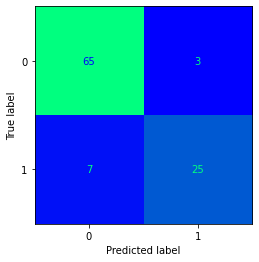

In [12]:
# Using sklearn to plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

plot_confusion_matrix(nbc, X_test, y_test, colorbar=False, cmap='winter');

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


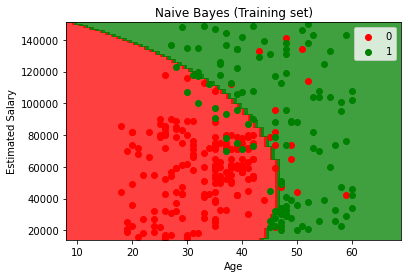

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, nbc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


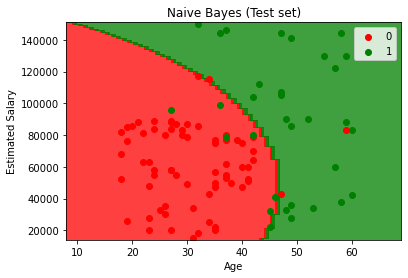

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, nbc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()